<a href="https://colab.research.google.com/github/sirox548/HealthcareInsurance/blob/main/HealthcareInsurance_Cost_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sqlite3
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
 from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/insurance.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
print(df.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [7]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

Viewing sample data.

In [8]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Checking for missing values

In [9]:
# Verify missing values are removed
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [10]:
# Check for duplicates
print(f"Duplicate rows before removal: {df.duplicated().sum()}")

Duplicate rows before removal: 1


In [11]:
# Remove duplicates
df = df.drop_duplicates()

In [12]:
# Verify duplicates are removed
print(f"Duplicate rows after removal: {df.duplicated().sum()}")

Duplicate rows after removal: 0


In [13]:
# Remove any negative age if any
df = df[df['age'] >= 0]

In [14]:
# Remove any negative charges if any
df = df[df['charges'] >= 0]

In [15]:
# Remove any negative charges if any
df = df[df['bmi'] >= 0]

In [16]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [17]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [18]:
# Verify the cleaned data
print(df.describe())

               age          bmi     children       charges
count  1337.000000  1337.000000  1337.000000   1337.000000
mean     39.222139    30.663452     1.095737  13279.121487
std      14.044333     6.100468     1.205571  12110.359656
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.290000     0.000000   4746.344000
50%      39.000000    30.400000     1.000000   9386.161300
75%      51.000000    34.700000     2.000000  16657.717450
max      64.000000    53.130000     5.000000  63770.428010


In [58]:
# Save clean data for Dashboard Design in Tableue
df.to_excel('/content/drive/MyDrive/cleanInsuranceData.xlsx')

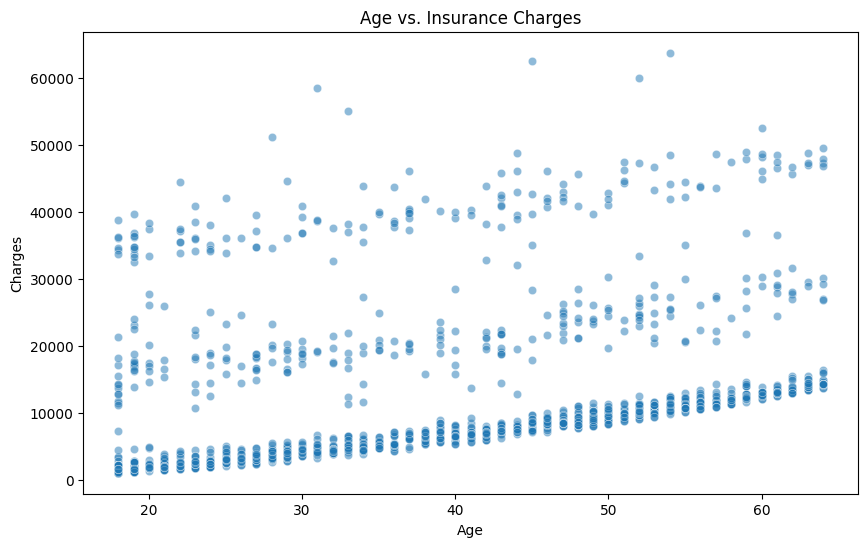

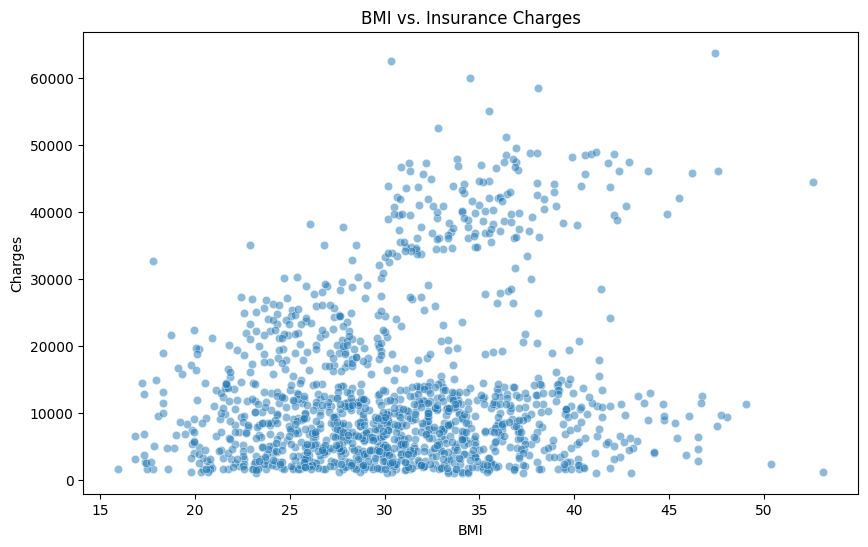

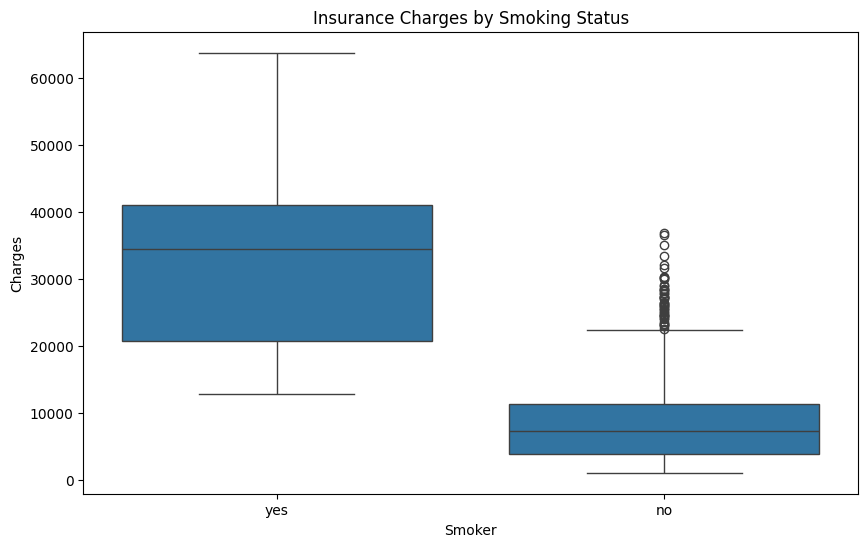

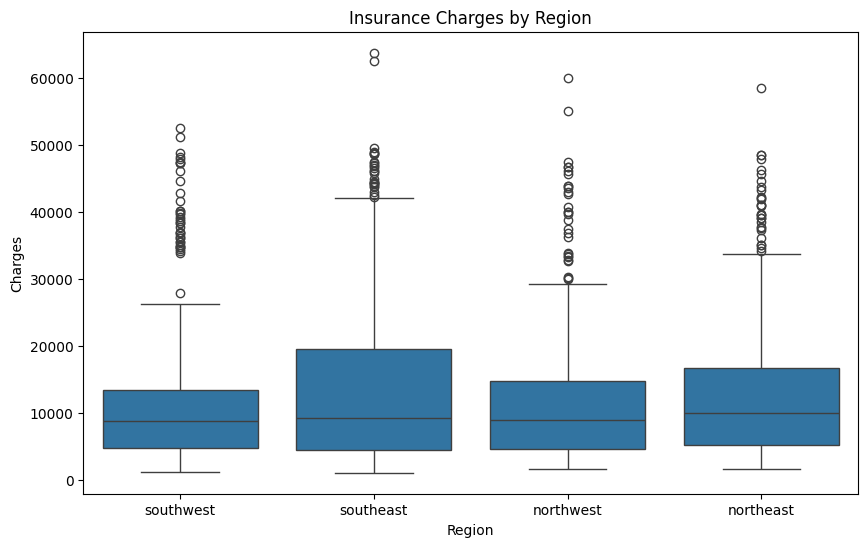

In [19]:
# Visualization: Age vs. Charges
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["age"], y=df["charges"], alpha=0.5)
plt.title("Age vs. Insurance Charges")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

# Visualization: BMI vs. Charges
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["bmi"], y=df["charges"], alpha=0.5)
plt.title("BMI vs. Insurance Charges")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.show()

# Visualization: Smoking vs. Charges
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["smoker"], y=df["charges"])
plt.title("Insurance Charges by Smoking Status")
plt.xlabel("Smoker")
plt.ylabel("Charges")
plt.show()

# Visualization: Region-wise Charges
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["region"], y=df["charges"])
plt.title("Insurance Charges by Region")
plt.xlabel("Region")
plt.ylabel("Charges")
plt.show()


In [20]:
# Encoding categorical variables
label_encoders = {}
categorical_columns = ["sex", "smoker"]
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# One-hot encoding for region
df = pd.get_dummies(df, columns=["region"], drop_first=True)


In [21]:
# Splitting the data into training and testing sets
X = df.drop(columns=["charges"])
y = df["charges"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Model Training and Evaluation
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} Performance:")
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R² Score:", r2_score(y_test, y_pred))


Linear Regression Performance:
MAE: 4177.045561036318
RMSE: 5956.342894363585
R² Score: 0.8069287081198013

Random Forest Performance:
MAE: 2636.4037010496268
RMSE: 4700.545910267128
R² Score: 0.8797583526299999

Gradient Boosting Performance:
MAE: 2517.4678305027105
RMSE: 4268.283017604773
R² Score: 0.9008563879867466


# Explanation of Model Choices
## 1. Linear Regression - Establishes a simple, interpretable baseline but assumes linearity.( Age, BMI vs Charges)
## 2. Random Forest - Handles non-linearity, robust against outliers, prevents overfitting.
## 3. Gradient Boosting - Boosts accuracy by improving weak learners sequentially, better for complex data.

1. Linear Regression
*   MAE: 4177.05
*   RMSE: 5956.34
*   R² Score: 0.8069

Interpretation:

*   Linear Regression provides a basic benchmark but has a higher error compared to other models.
*   Since R² is 0.8069, about 80.69% of the variance in charges is explained by the model.
*   The high RMSE indicates that the model struggles to capture complex relationships in the data, especially non-linearity (e.g., effects of smoking on charges).
# _________

2. Random Forest Regressor
*   MAE: 2636.40
*   RMSE: 4700.54
*   R² Score: 0.8797

Interpretation:

*   Random Forest improves accuracy significantly over Linear Regression.
*   R² score of 0.8797 suggests that the model explains 87.97% of the variance in insurance charges.
*   The lower RMSE and MAE mean the predictions are closer to actual values.
*   Since Random Forest is an ensemble method, it captures non-linearity better than Linear Regression.

#   ____________
3. Gradient Boosting Regressor
*   MAE: 2517.47
*   RMSE: 4268.28
*   R² Score: 0.9008

Interpretation:

*   Gradient Boosting outperforms both Linear Regression and Random Forest.
*   The lowest MAE (2517.47) and RMSE (4268.28) indicate better accuracy.
*   R² of 0.9008 suggests that 90.08% of the variance in charges is explained by the model.
*   Gradient Boosting improves predictions by learning from errors sequentially, making it more effective in capturing complex patterns.

**CONCLUSION:** Which Model is Best?

**Gradient Boosting Regressor is the best-performing model.**


In [23]:
# Hyperparameter tuning for Random Forest
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_
print("\nBest Random Forest Parameters:", grid_search_rf.best_params_)


Best Random Forest Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}


In [24]:
# Hyperparameter tuning for Gradient Boosting
gb_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10]
}
grid_search_gb = GridSearchCV(GradientBoostingRegressor(random_state=42), gb_params, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search_gb.fit(X_train, y_train)
best_gb = grid_search_gb.best_estimator_
print("\nBest Gradient Boosting Parameters:", grid_search_gb.best_params_)

# Evaluating optimized models
optimized_models = {"Optimized Random Forest": best_rf, "Optimized Gradient Boosting": best_gb}
for name, model in optimized_models.items():
    y_pred = model.predict(X_test)
    print(f"\n{name} Performance After Optimization:")
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R² Score:", r2_score(y_test, y_pred))



Best Gradient Boosting Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

Optimized Random Forest Performance After Optimization:
MAE: 2576.780631605354
RMSE: 4497.991655279873
R² Score: 0.8898978978650618

Optimized Gradient Boosting Performance After Optimization:
MAE: 2490.860259498592
RMSE: 4237.054473828103
R² Score: 0.9023018330966677


In [ ]:
!~~~~~~~~~~~JUNBVXCUNTYER09I987UYTIFT

In [ ]:
# Create an SQLite database
conn = sqlite3.connect("healthinsurance.db")

In [23]:
# Load DataFrame into SQLite
df.to_sql("insurance", conn, if_exists="replace", index=False)

1337

In [24]:
# Verify by displaying table names
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())  # Should display [('insurance',)]

[('insurance',)]
